> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Patients noshow appointments-may-2016.csv]



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p>
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their
appointment . A number of characteristics about the patient are included in each row .</p><br><br>

<li>Scheduled Day ' tells us on what day the patient set up their appointment .
<li>Nighborhood ' indicates the location of the hospital .
<li>scholarship ' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família .
<li>Be careful about the encoding of the last column : it says ' No ' if the patient showed up to their appointment , and ' Yes ' if they did not show up .<br><br>
    <strong style="font-size:21px">
 Dataset Description </strong><br><br>
   <li> Analysis the csv file whiich contains a data

<strong>Question(s) for data analysis

<strong style="font-size:24">What factors are  important for scheduled appointment

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [ ]:
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties




In [ ]:
#loading data and print few line of the data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

In [35]:
#check the shape of data
df.shape

(110527, 14)

In [36]:
##Check the duplication
df.duplicated().sum()
## chcecked . (No Duplication)

0

No Identical Duplication

In [37]:
#check the unique values
df['PatientId'].nunique()
#patients have the same appointment>1

62299


Only 62299 of 110527 are unique values

In [38]:
#check the same patient 
df.duplicated(['PatientId','No-show']).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523     True
110524    False
110525     True
110526     True
Length: 110527, dtype: bool>

38710 patient id have the same status of show or no , remove them in the clean data stage

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


NO Missing values

In [40]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min = -1 which is not logic 

In [41]:
#identifying the row index of -1 of age value
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show



### Data Cleaning



In [42]:
#dropping the -1 value in the age
df.drop(index=99832,inplace=True)

In [43]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [44]:
#correction column
df.rename(columns={'No-show':'No_show'},inplace=True)
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
#remove the duplicated showing , leaving the duplicated IDs with differ. show_status
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [46]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling summary

After gathering the data from the CSV file we explored the first few rows of the data set to the it's general properities , then we showed the dimensions of our
data , then we checked if there were any duplicated appointments , Then explored if there was duplicted patients IDs and removed them , then we turned to data
informations like data types and if there is any missing data to handle , then we saw some figures about our data like ( min , max , mean , etc ) , and finally i
cleaned our data by correcting the column names and dropping the unnecessary informations .

<a id='eda'></a>
## Exploratory Data Analysis

#Now that we've trimmed and cleaned data , ready to move on to exploration . Computing statistics and creating visualizations with the goal of addressing
the research questions that you posed in the Introduction section .

### General View

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

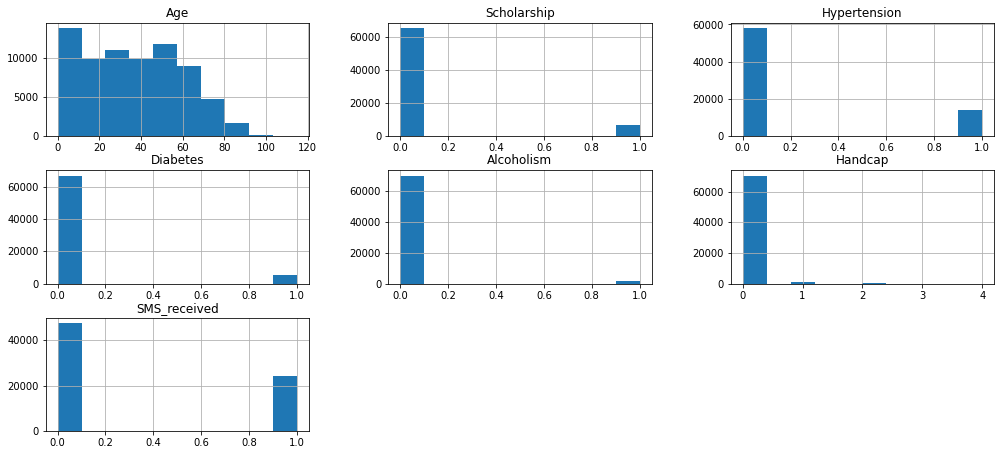

In [47]:

df.hist(figsize=(17,7.5))

In [48]:
# divid Patients into 2 groups accourding to show:
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count();df[noshow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

Show number three times the no show

In [50]:
df[show].mean(numeric_only=True),df[noshow].mean(numeric_only=True)


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age showed 37,noshowed 34 recieved sms less than no_show patients

### Investigation for influencing factors on attendance rates


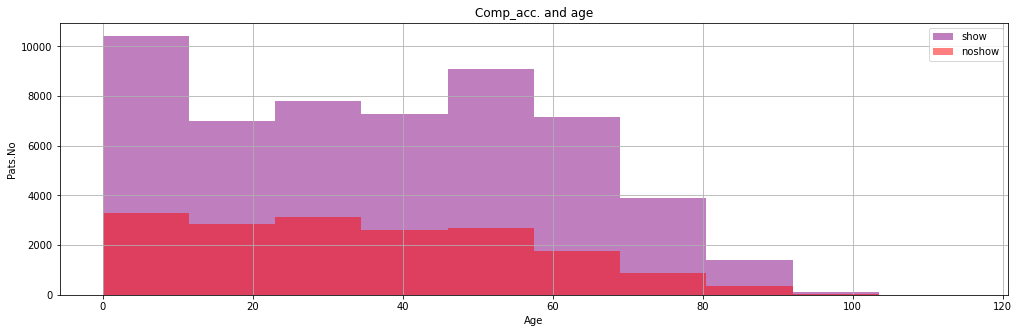

In [51]:
#does the age affect the attendance
def attendances(df,col_name,attended,absent):
    
    plt.figure(figsize=[17,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='purple',label='show')
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='red',label='noshow')
    plt.legend()
    plt.title('Comp_acc. and age')
    plt.xlabel('Age')
    plt.ylabel('Pats.No')
attendances(df,'Age',show,noshow)

ages from 0:8 are the most showing than from 45:55 and least attending is above 65 

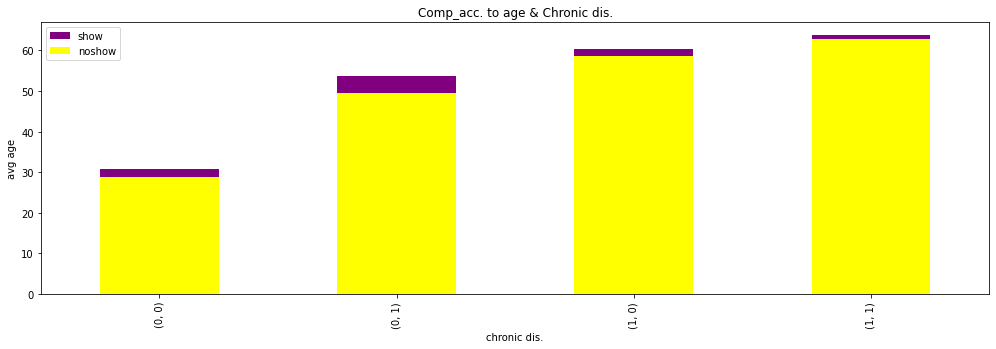

In [52]:
#does (the age and chronic diseases) affect on the attendance
plt.figure(figsize=[17,5])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='purple',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='yellow',label='noshow')
plt.legend();
plt.title('Comp_acc. to age & Chronic dis.')
plt.ylabel('avg age')
plt.xlabel('chronic dis.');

In [53]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

average age of the non chronic showing is 30 while noshowing is 28 avg. age of hypertension diabetic showing patients are around 64 and non_show is about 63 that means there is a corelation between age and chronic dise.and no correlation between attending and chronic diseases

Does the gender affect on attendance? 

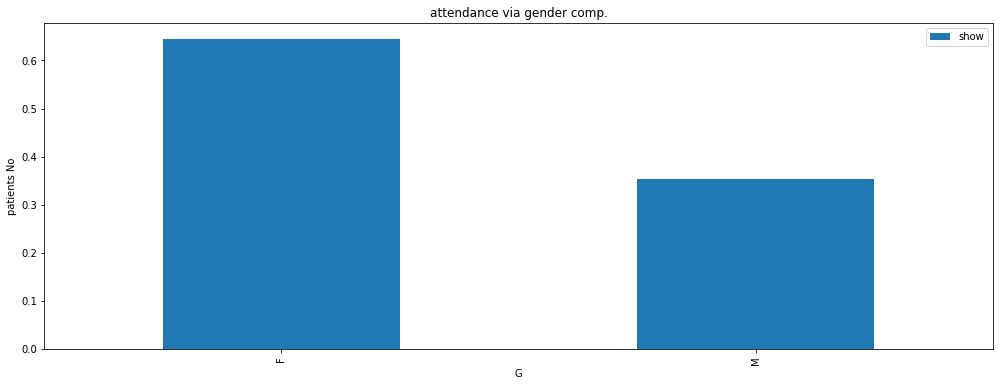

In [54]:
#the sexes precentage attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[17,6])
    df[col_name][show].value_counts(normalize=True).plot(kind='bar',label='show')
    plt.legend()
    plt.title('attendance via gender comp.')
    plt.ylabel('patients No')
    plt.xlabel('G')
attendance(df,'Gender',show,noshow)

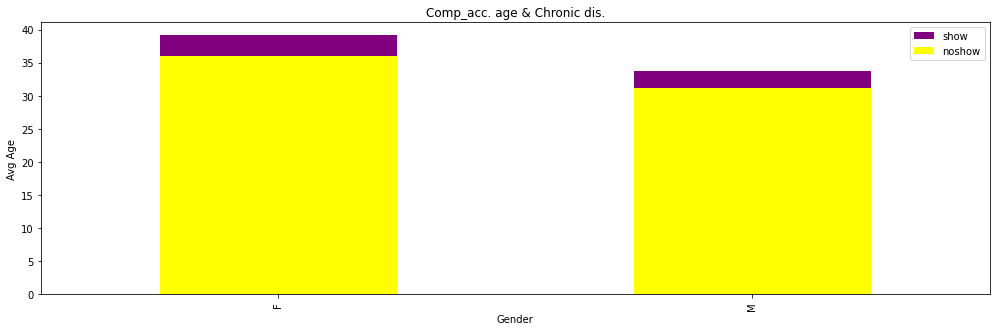

In [55]:
#the % of absent sexes
plt.figure(figsize=[17,5])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='purple',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='yellow',label='noshow')
plt.legend()
plt.title('Comp_acc. age & Chronic dis.')
plt.xlabel('Gender')
plt.ylabel('Avg Age')

In [56]:
print('Means: ',df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean())
print('Medians: ',df[show].groupby('Gender').Age.median(),df[show].groupby('Gender').Age.median())

Means:  Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64
Medians:  Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    39.0
M    32.0
Name: Age, dtype: float64


NO Correlation between gender and age<br>
mean and median of 2 sexes almost the same

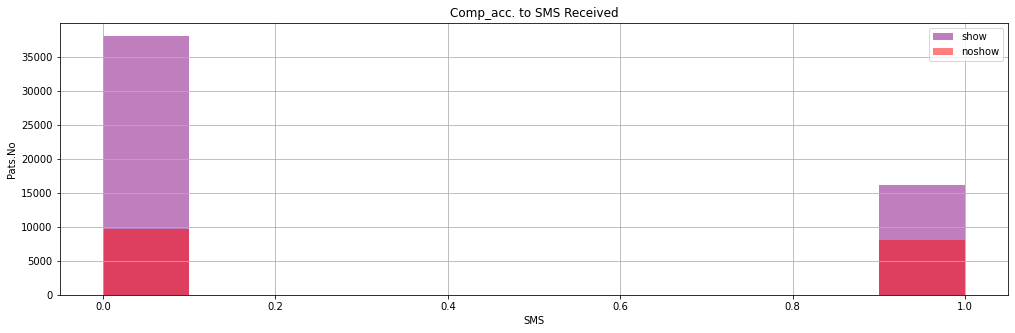

In [57]:
#does recieving SMS Affect the attendance
def attendances(df,col_name,attended,absent):
    
    plt.figure(figsize=[17,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='purple',label='show')
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='red',label='noshow')
    plt.legend()
    plt.title('Comp_acc. to SMS Received')
    plt.xlabel('SMS')
    plt.ylabel('Pats.No')
attendances(df,'SMS_received',show,noshow)

showing NO. with out recieving the SMS > showing ones<br>
that means we need to make a visit to our SMS_compaghin

Text(0.5, 1.0, 'Comp Between Neighbourhood and acc')

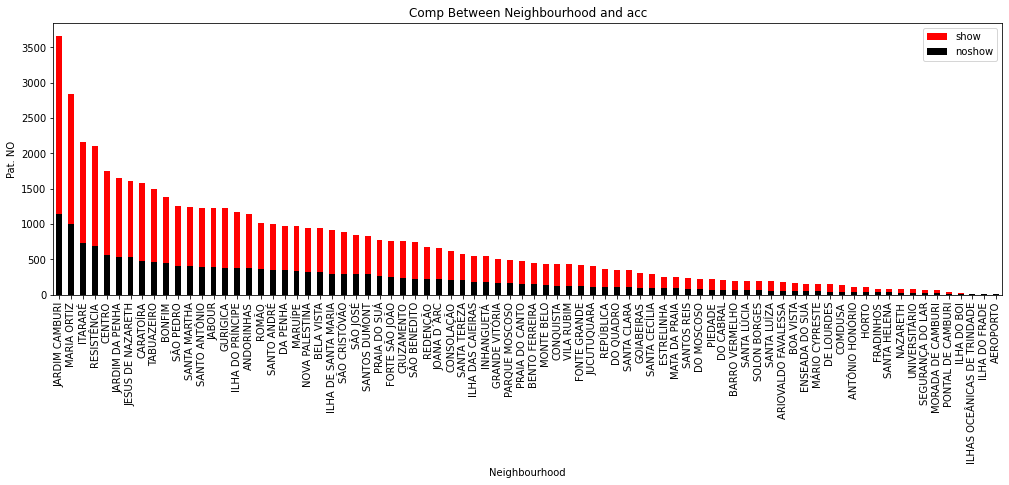

In [58]:
#Neighbourhood effect
plt.figure(figsize=[17,5])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='red',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='black',label='noshow')
plt.legend();
plt.xlabel('Neighbourhood')
plt.ylabel('Pat. NO');
plt.title('Comp Between Neighbourhood and acc')

Neighbourhood has high effect on attendance or not ,JARDIM CAMBURI has the greatest number of showing_rate and patiens

Text(0.5, 1.0, 'Comp Between Neighbourhood and acc,SMS_REC.')

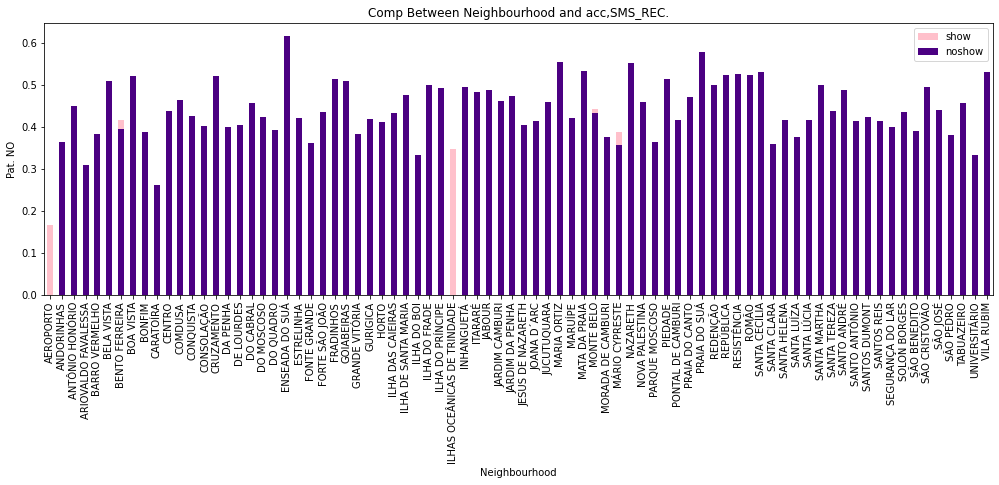

In [59]:
plt.figure(figsize=[17,5])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='pink',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='indigo',label='noshow')
plt.legend();
plt.xlabel('Neighbourhood')
plt.ylabel('Pat. NO');
plt.title('Comp Between Neighbourhood and acc,SMS_REC.')

Attendance from certain neighbourhood differ acc. to ages AEROPORTO then ILHA DO BOI are with high ages attendance

<a id='conclusions'></a>
## Conclusions
<ul>
<li><p style="color:red">.No clear correlation between showing and gender , chronic diseases , enrollement in the welfare program</p>

<li><p style="color:#eee,bgcolor:black">.Number of showing patients without receiving sms is greater than showing patients with receiving sms , which means that we need to revisit our sms
compaghin

<li><p style="color:blue">Neighbourhoon has a great effect on attendence or not: JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate .
<li><p style="color:purple">Number of showing patients from specific neighbourhood affected by receiving SMS and Ages .
<li style="color:#444">Age has a clear influence on the showing rate : Ages from 0 : 8 are the most showing ( parents taking care of their kids ) then from 45:55 and the least attending
are whom above 65 years old .
    </ul>




## Limitation 
No Correlation between (showing and gender and chronic deiseases, enrollement in the welfare program)

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1